# EDA

First few rows of the dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Summary Statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%

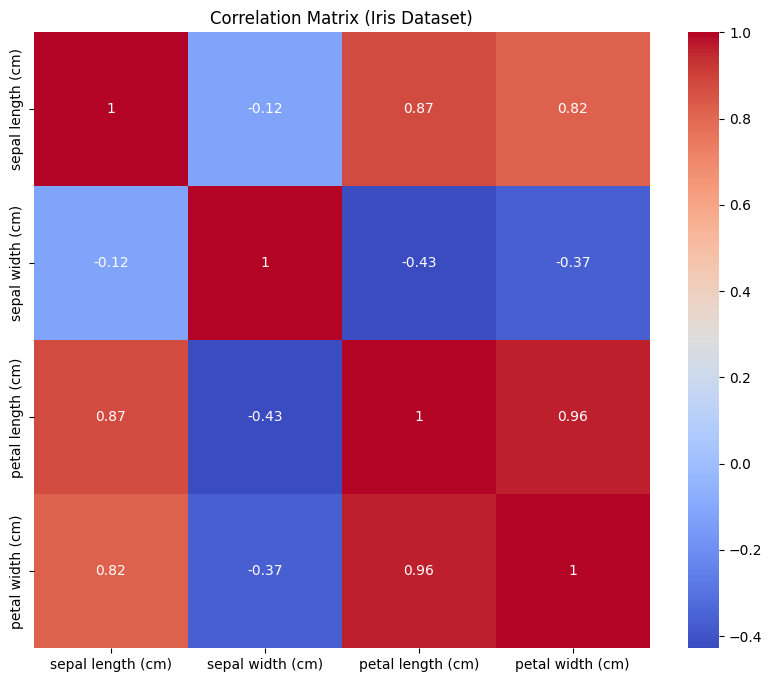

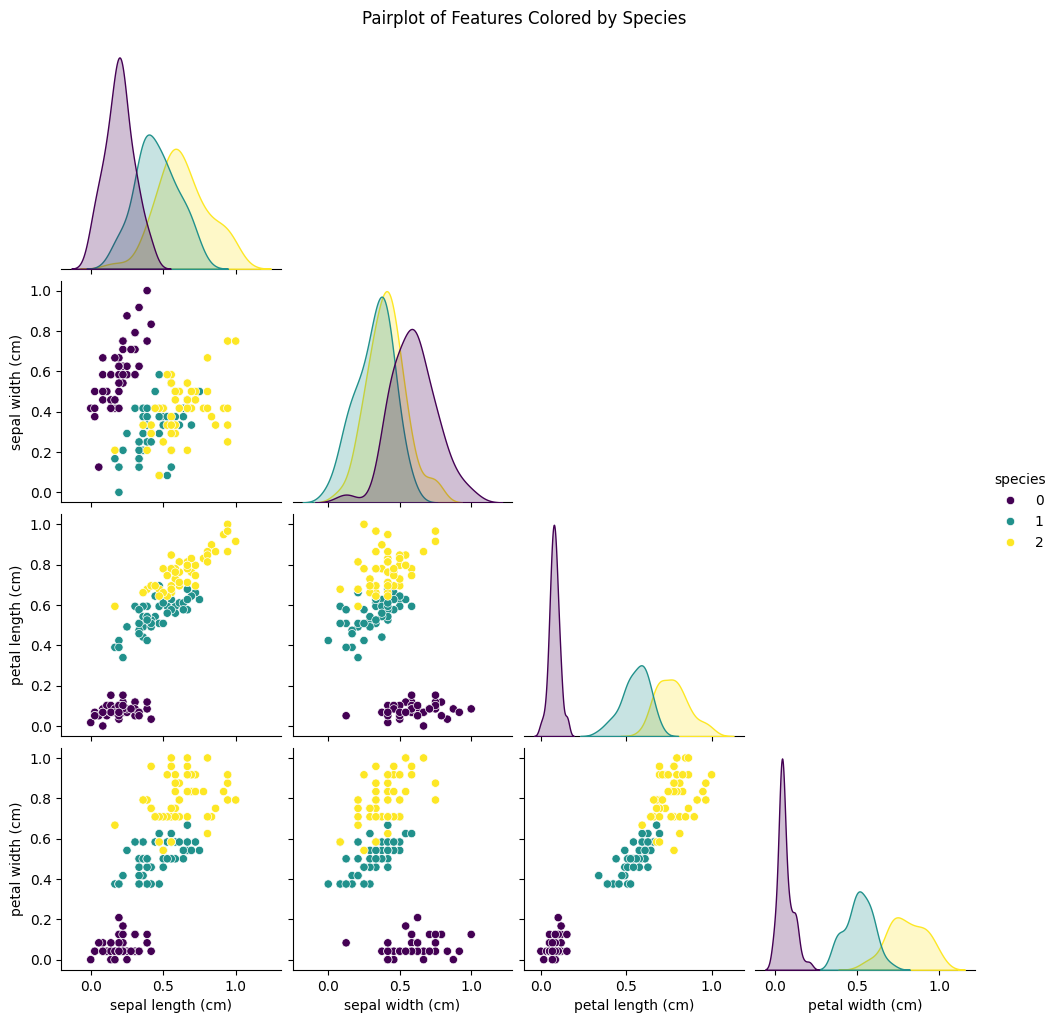

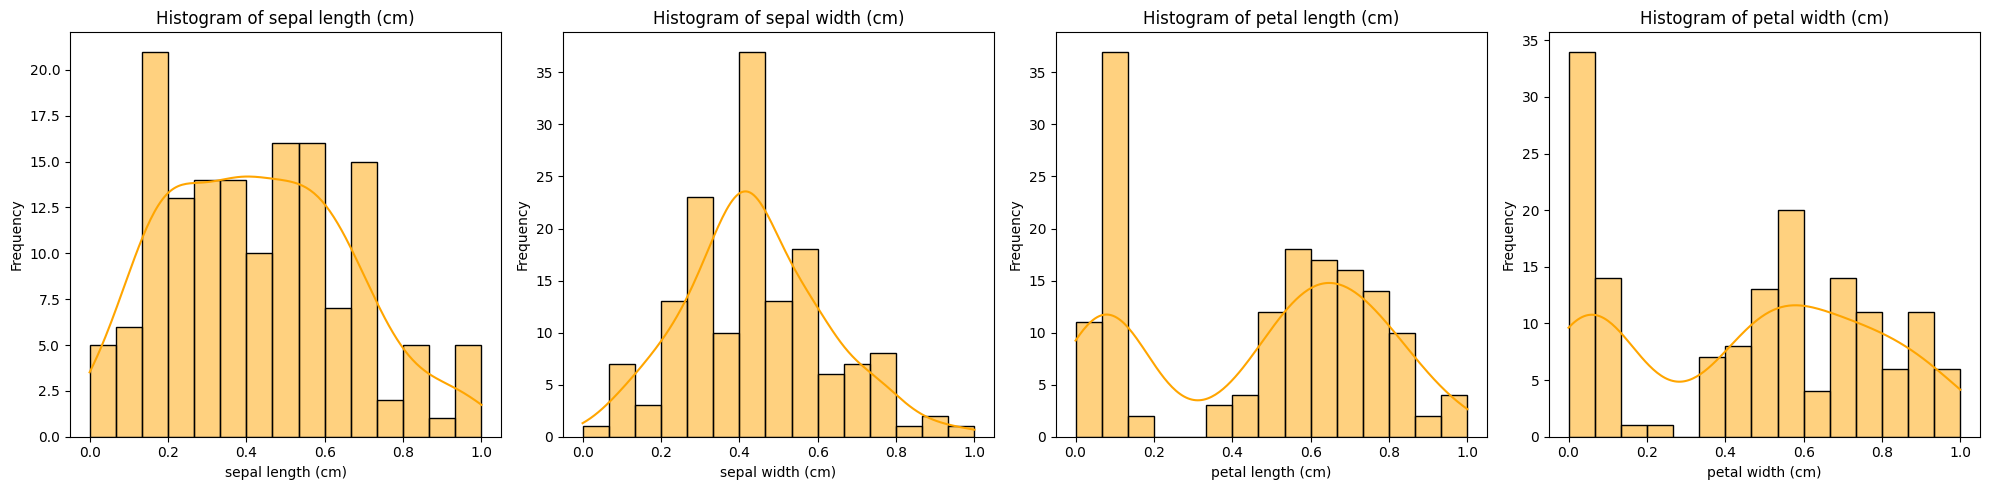

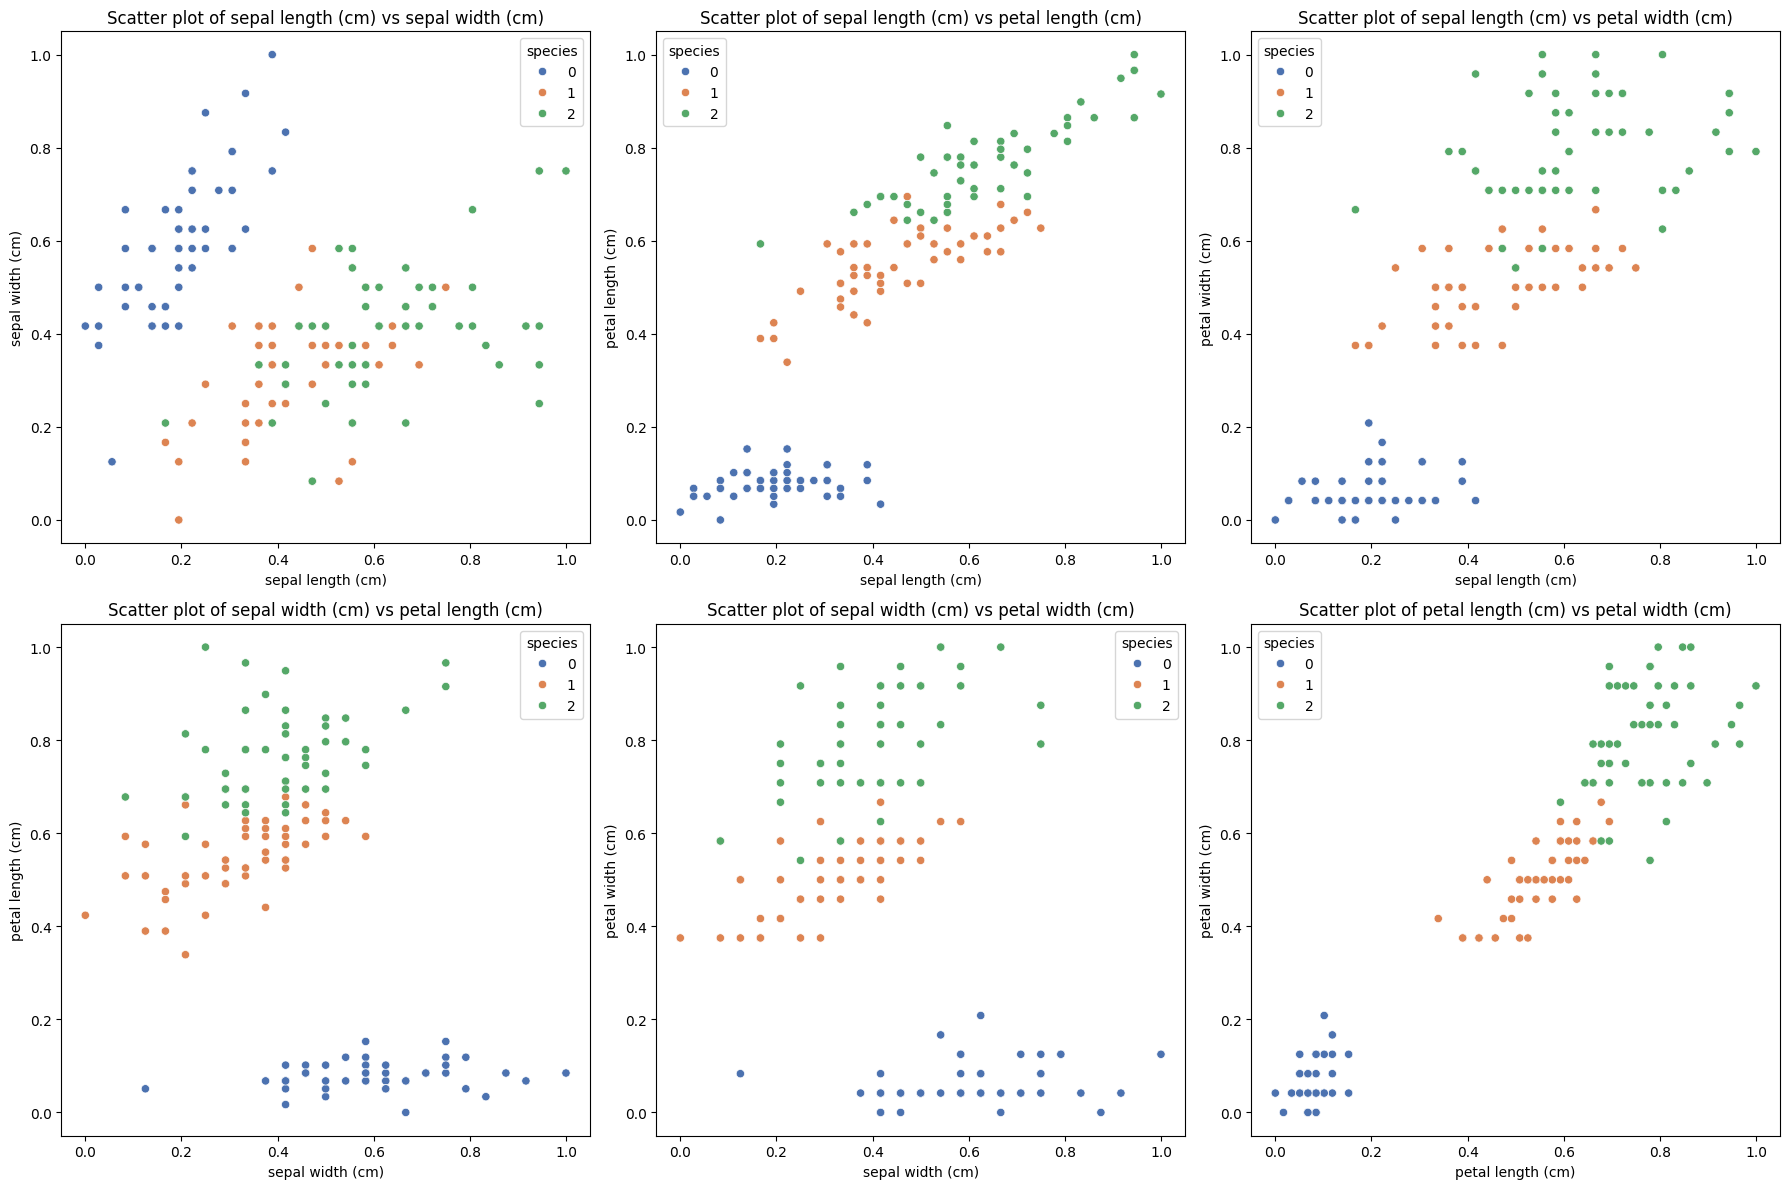

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Display basic statistics and missing values
print("First few rows of the dataset:\n", data.head())
print("\nSummary Statistics:\n", data.describe())
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Normalize the numeric features
scaler = MinMaxScaler()
numerical_features = data.columns[:-1]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("\nNormalized Data:\n", data)

# Correlation matrix
numeric_data = data[numerical_features]
corr_matrix = numeric_data.corr()
print("\nCorrelation Matrix:\n", corr_matrix)

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix (Iris Dataset)")
plt.show()

# Pairplot with species as hue
sns.pairplot(data, hue='species', palette='viridis', corner=True)
plt.suptitle("Pairplot of Features Colored by Species", y=1.02)
plt.show()

# Distribution plots (Histograms)
num_cols = len(numeric_data.columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 5))
for i, column in enumerate(numeric_data.columns):
    sns.histplot(numeric_data[column], kde=True, ax=axes[i], bins=15, color='orange')
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Scatter plots with annotations
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

columns = list(numeric_data.columns)
plot_idx = 0
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        sns.scatterplot(x=numeric_data[columns[i]], y=numeric_data[columns[j]], hue=data['species'], ax=axes[plot_idx], palette='deep')
        axes[plot_idx].set_title(f"Scatter plot of {columns[i]} vs {columns[j]}")
        axes[plot_idx].set_xlabel(columns[i])
        axes[plot_idx].set_ylabel(columns[j])
        plot_idx += 1

# Hide unused axes
for ax in axes[plot_idx:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import numpy as np

# Small Input Data
data = {
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [5.5, 4.5, 6.0, 3.5, 7.0]
}
df = pd.DataFrame(data)
print("Original Data:\n", df)

# Min-Max Normalization
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Decimal Scaling Normalization
def decimal_scaling_normalize(series):
    scale_factor = 10 ** (len(str(series.abs().max())))
    return series / scale_factor

# Z-Score Normalization
def z_score_normalize(series):
    return (series - series.mean()) / series.std()

# Apply normalization to all numeric features
normalized_df = df.copy()
for column in df.columns:
    normalized_df[f'{column}_min_max'] = min_max_normalize(df[column])
    normalized_df[f'{column}_decimal'] = decimal_scaling_normalize(df[column])
    normalized_df[f'{column}_zscore'] = z_score_normalize(df[column])

print("\nNormalized Data:\n", normalized_df)



Original Data:
    Feature1  Feature2
0        10       5.5
1        20       4.5
2        30       6.0
3        40       3.5
4        50       7.0

Normalized Data:
    Feature1  Feature2  Feature1_min_max  Feature1_decimal  Feature1_zscore  \
0        10       5.5              0.00               0.1        -1.264911   
1        20       4.5              0.25               0.2        -0.632456   
2        30       6.0              0.50               0.3         0.000000   
3        40       3.5              0.75               0.4         0.632456   
4        50       7.0              1.00               0.5         1.264911   

   Feature2_min_max  Feature2_decimal  Feature2_zscore  
0          0.571429            0.0055         0.148047  
1          0.285714            0.0045        -0.592187  
2          0.714286            0.0060         0.518163  
3          0.000000            0.0035        -1.332420  
4          1.000000            0.0070         1.258396  


In [13]:
# Binning Function
def binning(dataframe, column, num_bins, strategy='mean'):
    # Map the string strategy to a NumPy function
    strategies = {
        'mean': np.mean,
        'median': np.median
    }
    if strategy not in strategies:
        raise ValueError(f"Invalid strategy: {strategy}. Choose 'mean' or 'median'.")

    bins = pd.cut(dataframe[column], bins=num_bins, labels=False, retbins=False)
    dataframe[f'{column}_binned_{strategy}'] = dataframe.groupby(bins)[column].transform(strategies[strategy])
    return dataframe

# Apply binning to each column
binned_df = df.copy()
num_bins = 3
binning_strategy = 'median'

for column in df.columns:
    binned_df = binning(binned_df, column, num_bins=num_bins, strategy=binning_strategy)

print("\nBinned Data:\n", binned_df)


Binned Data:
    Feature1  Feature2  Feature1_binned_median  Feature2_binned_median
0        10       5.5                    15.0                     5.5
1        20       4.5                    15.0                     4.0
2        30       6.0                    30.0                     6.5
3        40       3.5                    45.0                     4.0
4        50       7.0                    45.0                     6.5


<ipython-input-13-ce63f8a13175>:12: FutureWarning: The provided callable <function median at 0x7d89af924ca0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  dataframe[f'{column}_binned_{strategy}'] = dataframe.groupby(bins)[column].transform(strategies[strategy])
<ipython-input-13-ce63f8a13175>:12: FutureWarning: The provided callable <function median at 0x7d89af924ca0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  dataframe[f'{column}_binned_{strategy}'] = dataframe.groupby(bins)[column].transform(strategies[strategy])


# Apriori Algo

In [5]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Example dataset
dataset = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'jam'],
    ['milk', 'bread', 'butter', 'jam']
]

# Convert transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_data = te.fit_transform(dataset)
df = pd.DataFrame(te_data, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

# Add the 'num_itemsets' parameter for older versions of mlxtend
rules = association_rules(
    frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=len(frequent_itemsets)
)

# Display the results
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
    support               itemsets
0      1.00                (bread)
1      0.75               (butter)
2      0.75                  (jam)
3      0.75                 (milk)
4      0.75        (bread, butter)
5      0.75           (bread, jam)
6      0.75          (bread, milk)
7      0.50          (jam, butter)
8      0.50         (milk, butter)
9      0.50            (milk, jam)
10     0.50   (bread, jam, butter)
11     0.50  (bread, milk, butter)
12     0.50     (bread, milk, jam)

Association Rules:
       antecedents     consequents  antecedent support  consequent support  \
0          (bread)        (butter)                1.00                0.75   
1         (butter)         (bread)                0.75                1.00   
2          (bread)           (jam)                1.00                0.75   
3            (jam)         (bread)                0.75                1.00   
4          (bread)          (milk)                1.00                0.75   
5  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


# Decision tree

In [27]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree classifier
ID3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
ID3.fit(X_train, y_train)

# Predict on the test set
y_pred = ID3.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# New instance for prediction (e.g., a new row of features)
new_instance = [[1.8, 5.9, 1.5, 5.5]]  # Example: Features for a new Iris flower
# Predict the class for the new instance
new_prediction = ID3.predict(new_instance)
print("Prediction for new instance1:", new_prediction)

new_instance1 = [[6.3, 2.9, 5.6, 1.8]]
new_prediction1 = ID3.predict(new_instance1)
print("Prediction for new instance2:", new_prediction1)


Accuracy: 0.9777777777777777
Prediction for new instance1: [0]
Prediction for new instance2: [2]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNeighborsClassifier with k=3
model = KNeighborsClassifier(n_neighbors=3)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

new_instance = [[5.1, 3.5, 1.4, 0.2]]  # Example features (sepal length, sepal width, petal length, petal width)

# Predict the class of the new instance
prediction = model.predict(new_instance)
predicted_class = data.target_names[prediction][0]
print(f"The predicted class for the new instance is: {predicted_class}")


Accuracy: 1.0000
The predicted class for the new instance is: setosa


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Agglomerative clustring

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


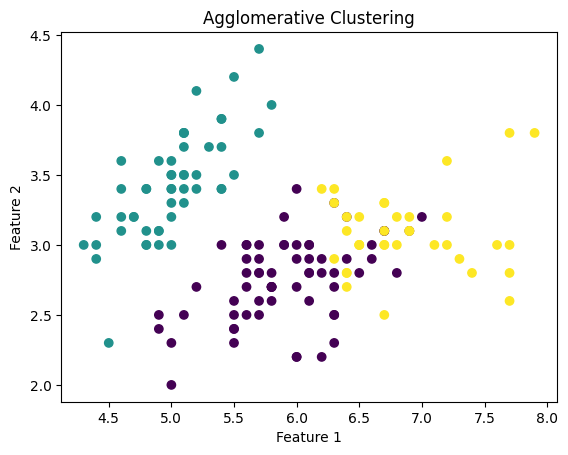

In [30]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data

# Initialize AgglomerativeClustering with 3 clusters
model = AgglomerativeClustering(n_clusters=3)

# Fit the model and predict the cluster labels
y_pred = model.fit_predict(X)

# Plot the results (2D projection for visualization)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering')
plt.show()


# Kmean Clustering

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


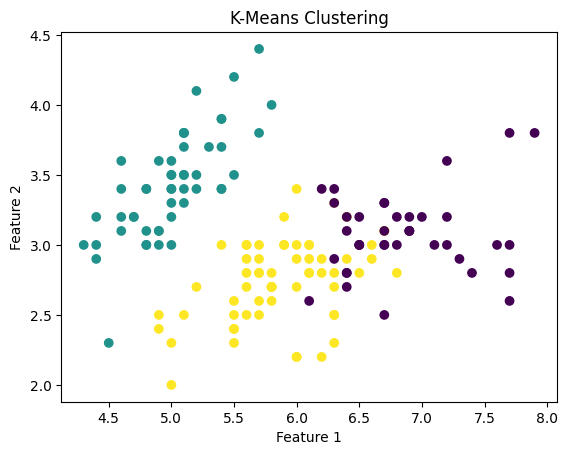

In [31]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data

# Initialize KMeans with 3 clusters
model = KMeans(n_clusters=3, random_state=42)

# Fit the model and predict the cluster labels
y_pred = model.fit_predict(X)

# Plot the results (2D projection for visualization)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample corpus (list of documents)
corpus = [
    'the cat in the hat',
    'the quick brown fox',
    'the lazy dog'
]

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the model and transform the corpus to TF-IDF matrix
X = vectorizer.fit_transform(corpus)

# Convert the TF-IDF matrix to a dense format and display it
tfidf_matrix = X.toarray()
print("TF-IDF Matrix:")
print(tfidf_matrix)

# Display feature names (terms in the vocabulary)
print("\nFeature Names (Vocabulary):")
print(vectorizer.get_feature_names_out())


TF-IDF Matrix:
[[0.         0.4769856  0.         0.         0.4769856  0.4769856
  0.         0.         0.56343076]
 [0.54645401 0.         0.         0.54645401 0.         0.
  0.         0.54645401 0.32274454]
 [0.         0.         0.65249088 0.         0.         0.
  0.65249088 0.         0.38537163]]

Feature Names (Vocabulary):
['brown' 'cat' 'dog' 'fox' 'hat' 'in' 'lazy' 'quick' 'the']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
